<a href="https://colab.research.google.com/github/duiliod/PI/blob/main/TP_4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 4
## Deangeli Duilio

In [1]:
#imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import data
import copy
import seaborn as sns

In [2]:
#matrices que nos permiten pasarnos a los distintos espacios vectoriales
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

In [3]:
def read_img(path):
    img = Image.open(path) 
    return img

def save_img(path,img):
    img = img.save(path)

def img2arr(img):
    img_arr = np.asarray(img)
    return img_arr

def arr2img(img_arr):
    img = Image.fromarray(np.uint8(img_arr))
    return img

def norm_Img(arrimg):
    arr_norm = arrimg/255
    return arr_norm

def rgb2yml(arr_img):
    result = np.dot(arr_img, RGB2YIQ.transpose())
    return result

def yiq2rgb(arr_img):
    OrigShape=arr_img.shape
    return np.dot(arr_img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)

def change_y(arr_img, alfa):
    arr_img[:,:,0] = arr_img[:,:,0] * alfa  
    return arr_img

def change_i(arr_img, beta):
    arr_img[:,:,1] = arr_img[:,:,1] * beta  
    return arr_img

def change_q(arr_img, beta):
    arr_img[:,:,2] = arr_img[:,:,2] * beta  
    return arr_img

# Histogram

In [4]:
def get_yiq(img):

  img_n = np.clip(norm_Img(img), a_min=np.array([0,0,0]), a_max=np.array([1,1,1]))

  img_y = rgb2yml(img_n)

  return img_y

In [5]:
Noelia = data.astronaut()

Noelia_y=get_yiq(Noelia)

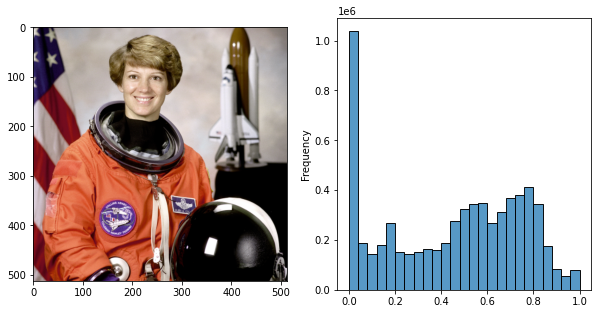

In [6]:
#@title Choose aritmetic options. { run: "auto" }

def plot(bins):
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.imshow(Noelia)

  plt.subplot(122)
  sns.histplot(data= Noelia_y[:,:,0].flatten(),
               stat='frequency',  bins=bins,cbar=False)

  plt.show()

bins = "25" #@param [5,10,25,50,75,100]
plot(int(bins))

# Punto 2

Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado. 

In [7]:
def change_light(img,alfa):
  img_yiq = get_yiq(img)
  new_img= change_y(img_yiq,alfa)
  return new_img

def lighting(img):
  new_img = get_yiq(img)
  new_img[:,:,0] = np.sqrt(new_img[:,:,0])
  new_img = np.clip(new_img, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  return new_img

def darking(img):
  new_img = get_yiq(img)
  new_img[:,:,0] = np.power(new_img[:,:,0],2)
  new_img = np.clip(new_img, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  return new_img


In [8]:
def f_linear(img,min, max):

  img2 = img.copy()
  img2 = np.clip(img2, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  
  y_arr = img2[:,:,0]
  for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
      if y_arr[i,j] > max:
        y_arr[i,j]=1
      if y_arr[i,j] < min:
        y_arr[i,j]=0
      if y_arr[i,j] > min and y_arr[i,j] < max:
        y_arr[i,j] = (y_arr[i,j]-min)/(max) 
 
  img2[:,:,0]=y_arr
  img2 = np.clip(img2, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

  linear_img = yiq2rgb(img2)
  linear_img = np.clip(linear_img, a_min=np.array([0,0,0]), a_max=np.array([1,1,1]))
  linear_img = np.uint32(linear_img * 255)
  linear_img = np.clip(linear_img, a_min=np.array([0,0,0]), a_max=np.array([255,255,255]))
  
  return linear_img

def alter_img(img, alfa, function):
  if function == 'alfa':
    img = change_light(img,alfa)
  if function == 'sqrt':
    img = lighting(img)
  if function == 'sqr':
    img = darking(img)
  img = yiq2rgb(img)
  img =  np.uint16(img * 255)
  img = np.clip(img, a_min=np.array([0,0,0]), a_max=np.array([255,255,255]))
  return img

In [9]:
def plot(alfa,y_min, y_max,img,method):  

  plt.figure(figsize=(10,5))

  yiq = get_yiq(img)
  img = f_linear(yiq.copy(),y_min,y_max)
  new_img = alter_img(img,alfa,method)

  plt.subplot(2, 2, 1)  
  plt.imshow(img)

  plt.subplot(2, 2, 2)
  sns.histplot(data= img.flatten(),
                stat='frequency',  bins=10,cbar=False)
  plt.subplot(2, 2, 3)
  plt.imshow(new_img)


  plt.subplot(2, 2, 4)
  sns.histplot(data= new_img.flatten(),
                stat='frequency',  bins=10,cbar=False)

  plt.show()

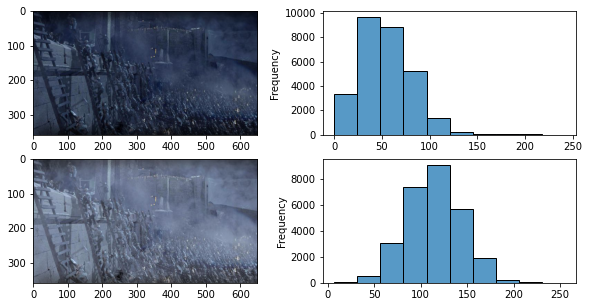

In [10]:
#@title Change Y in img {run:"auto"}

y_min = 0 #@param {type:"slider", min:0, max:1, step:0.1}
y_max = 0.9 #@param {type:"slider", min:0, max:1, step:0.1}

alfa = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

dark = read_img('/content/dark.jpg')
arr = img2arr(dark)

method= 'sqrt' #@param ["alfa","sqrt","sqr"]

plot(alfa,y_min,y_max,arr,method)

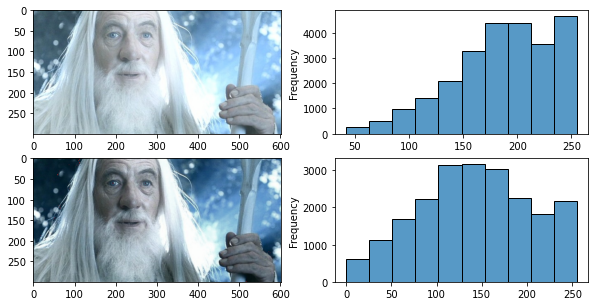

In [11]:
#@title Change Y in img {run:"auto"}

y_min = 0 #@param {type:"slider", min:0, max:1, step:0.1}
y_max = 1 #@param {type:"slider", min:0, max:1, step:0.1}

alfa = 0.6 #@param {type:"slider", min:0, max:1, step:0.1}

light_img = read_img('/content/gandalf.jpg')
arr = img2arr(light_img)

method = 'sqr' #@param ["alfa","sqrt","sqr"]

plot(alfa,y_min,y_max,arr,method)